In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Collected the dataset from Kaggle

In [2]:
df=pd.read_csv("C:\\Users\\sheli\\Desktop\\Data Analyst Project resume\\Rough\\Data Sceintist Salary\\data_cleaned_2021.csv" ,encoding='unicode_escape')

In [3]:
df.columns #checking the name of the columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

#### droping the index columns inorder to find out & remove duplicate rows in the data set.
#### Index column will restrict users from figuring out duplicate rows as it holds unique datas

In [4]:
print (df.drop(['index'],axis=1, inplace=True)) 

None


In [5]:
print (df.head(2))

                   Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   

                                 Company Name         Location   Headquarters  \
0                      Tecolote Research\n3.8  Albuquerque, NM     Goleta, CA   
1  University of Maryland Medical System\n3.4    Linthicum, MD  Baltimore, MD   

          Size  Founded   Type of ownership  ... tensor hadoop tableau bi  \
0  501 - 1000      1973   Company - Private  ...      0      0       1  1   
1      10000+      1984  Other Organization  ...      0      0       0  0   

   flink  mongo  google_an   job_title_sim  seniority_by_title Degree  
0      0      0          0  data scientist                  na      M  
1  

In [6]:
df.shape  #checking the number of rows and columns present in the dataset

(742, 41)

In [7]:
df.info() #checking the data type and null values present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [8]:
print (df.isnull().sum()) #checking for null values in the data set

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64


### Note:-There is no NaN values present in the dataset but there may be chances that NaN values are replaced by 0 0r -1.

In [9]:
print (df.columns) #checking the name of the columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')


### Checking for duplicate values in the dataframe(df)

In [10]:
df.duplicated()  #Boolean Value 'True' suggests that there is duplicate data present

0      False
1      False
2      False
3      False
4      False
       ...  
737     True
738     True
739     True
740     True
741     True
Length: 742, dtype: bool

In [11]:
df.duplicated().sum() #275 rows contains duplicate data

275

In [12]:
print (df.drop_duplicates(inplace=True)) #Removing Duplicate datas,275 rows got removed

None


In [13]:
df.duplicated().sum() # rechecking duplicate datas if exist

0

In [14]:
df.shape  #742-275=467 , Should fetch 467 rows and 41 columns

(467, 41)

# Data Cleaning

#### 1.Cleaning the datas present in Company Name Columnn as it is in wrong format

In [15]:
print (df['Company Name'])  

0                          Tecolote Research\n3.8
1      University of Maryland Medical System\n3.4
2                                    KnowBe4\n4.8
3                                       PNNL\n3.8
4                         Affinity Solutions\n2.9
                          ...                    
695                       Medidata Solutions\n4.3
700                          DatamanUSA, LLC\n3.4
716                                  23andMe\n4.0
732                         CK-12 Foundation\n4.1
735                                Fivestars\n3.9
Name: Company Name, Length: 467, dtype: object


### Data present in "Company Name" column is not correct. We only need to consider data before "\n" character

### Either use lambda function or for loop to change all the values of a particular column
### Here I am using for loop to clean data

In [16]:
# 1.Check the total count of original column
print (df['Company Name']) 

# 2.creating a new list CompanyName holding the values of the original column i.e Company Name 
CompanyName=df['Company Name'].to_list()  
print (CompanyName)  

# 3.Creating an empty list to hold the datas post for loop operation
# We are running for loop to remove unwanted data 
emptylist=[]
for i in CompanyName:
    x=i.rsplit('\n')
    emptylist.append(x[0])

# 4.Creating a new column CompanyName inside the dataframe
df['CompanyName']=emptylist
#print (df['CompanyName'])

0                          Tecolote Research\n3.8
1      University of Maryland Medical System\n3.4
2                                    KnowBe4\n4.8
3                                       PNNL\n3.8
4                         Affinity Solutions\n2.9
                          ...                    
695                       Medidata Solutions\n4.3
700                          DatamanUSA, LLC\n3.4
716                                  23andMe\n4.0
732                         CK-12 Foundation\n4.1
735                                Fivestars\n3.9
Name: Company Name, Length: 467, dtype: object
['Tecolote Research\n3.8', 'University of Maryland Medical System\n3.4', 'KnowBe4\n4.8', 'PNNL\n3.8', 'Affinity Solutions\n2.9', 'CyrusOne\n3.4', 'ClearOne Advantage\n4.1', 'Logic20/20\n3.8', 'Rochester Regional Health\n3.3', '<intent>\n4.6', 'Wish\n3.5', 'ManTech\n4.1', 'Walmart\n3.2', 'Yesler\n4.1', 'Takeda Pharmaceuticals\n3.7', 'Audible\n3.6', 'Blueprint Medicines\n3.9', 'h2o.ai\n4.3', 'Nuna\n4.2

#### Dropping the original column "Company Name" as we have now created a new column "CompanyName" holiding the same details

In [17]:
df.drop('Company Name',axis=1,inplace=True)
#print (df.columns) #rechecking if the column got dropped

### 2.Cleaning the data present in salary estimaation column

#### Using lambda function to remove the "(Glassdoor est.)", '$' ,'K' from the data

In [18]:
print (df.columns)
print (df['Salary Estimate'])

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Hourly', 'Employer provided',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'company_txt',
       'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'job_title_sim', 'seniority_by_title',
       'Degree', 'CompanyName'],
      dtype='object')
0       $53K-$91K (Glassdoor est.)
1      $63K-$112K (Glassdoor est.)
2       $80K-$90K (Glassdoor est.)
3       $56K-$97K (Glassdoor est.)
4      $86K-$143K (Glassdoor est.)
                  ...             
695    $63K-$110K (Glassdoor est.)
700    $65K-$113K (Glassdoor est.)
716    $59K-$125K (Glassdoor est.)
732    $80K-$142K (Glassdoor est.)
735    $62K-$113K (Glassdoor est.)
Name: Salary Estimate, Length:

In [19]:
df['SalarySlab'] = df['Salary Estimate'].apply(lambda x: str(x).replace('$',' ').replace('K',' ').replace(' ','').rstrip('(Glassdoor est.)').lstrip('EmployerProvidedSalary:').rstrip('Per Hour').rstrip('(Employer est.)'))
print (df['SalarySlab'].to_string())
print (df.columns)

0        53-91
1       63-112
2        80-90
3        56-97
4       86-143
5       71-119
6        54-93
7       86-142
8        38-84
9      120-160
10     126-201
11      64-106
12     106-172
13       46-85
14      83-144
15     102-190
16      67-137
17     118-189
18     110-175
19      64-111
20      81-130
21      73-119
22      86-139
23      63-105
24     109-177
25      63-110
26      75-124
27       34-61
28      63-105
31      72-120
32      86-143
33      93-149
34      85-140
35      77-135
36      82-132
37      83-137
38     115-180
39      74-138
40      64-112
41      68-129
42     110-175
43      52-113
44     110-150
45     150-160
46     158-211
47       20-39
48      56-117
49       63-99
50      68-114
51      86-143
52       41-95
53      86-144
54      80-139
55       56-95
56     120-189
57     111-176
60      82-132
61      84-146
62     107-172
63       49-85
64      61-109
65      88-148
66       60-99
67       41-72
68      96-161
69      65-130
70       5

In [20]:
df['Salary']=df['SalarySlab'].apply(lambda x: int(str(x).split("-")[0])+ int(str(x).split("-")[1]))/2
print (df['Salary'])

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
695     86.5
700     89.0
716     92.0
732    111.0
735     87.5
Name: Salary, Length: 467, dtype: float64


#### droping the original column

In [21]:
df.drop(['Salary Estimate'],axis='columns', inplace=True)
print (df.columns)

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Hourly', 'Employer provided', 'Lower Salary',
       'Upper Salary', 'Avg Salary(K)', 'company_txt', 'Job Location', 'Age',
       'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an', 'job_title_sim', 'seniority_by_title', 'Degree',
       'CompanyName', 'SalarySlab', 'Salary'],
      dtype='object')


In [22]:
print (df['SalarySlab'])
print (df['Salary'])

0       53-91
1      63-112
2       80-90
3       56-97
4      86-143
        ...  
695    63-110
700    65-113
716    59-125
732    80-142
735    62-113
Name: SalarySlab, Length: 467, dtype: object
0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
695     86.5
700     89.0
716     92.0
732    111.0
735     87.5
Name: Salary, Length: 467, dtype: float64


# Exploratory Data Analysis

# 1.Top 10 Job Titles in Glassdoor

In [23]:
Job_Titles=df['Job Title'].value_counts().head(10)   #we are creating a pandas series
print (Job_Titles)

Data Scientist              100
Data Engineer                37
Senior Data Scientist        21
Data Analyst                 13
Senior Data Engineer          8
Senior Data Analyst           7
Lead Data Scientist           5
Research Scientist            4
Principal Data Scientist      3
Sr. Data Analyst              3
Name: Job Title, dtype: int64


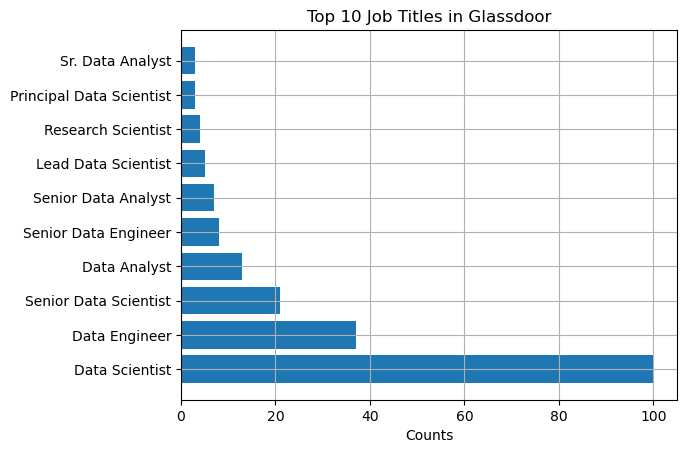

In [24]:
Job=Job_Titles.index
#print (Job)
Count=Job_Titles.to_list()
#print (Count)

plt.barh(Job,Count)
plt.xlabel("Counts")
plt.title("Top 10 Job Titles in Glassdoor")
plt.grid()
plt.show()

#### Insight:- Data Scientist, Data Engineer, Senior Data Scientist are the top job roles available in Glassdoor

### 2.Find out the Top 5 Organization based on rating for Data Scientist Job in Glassdoor

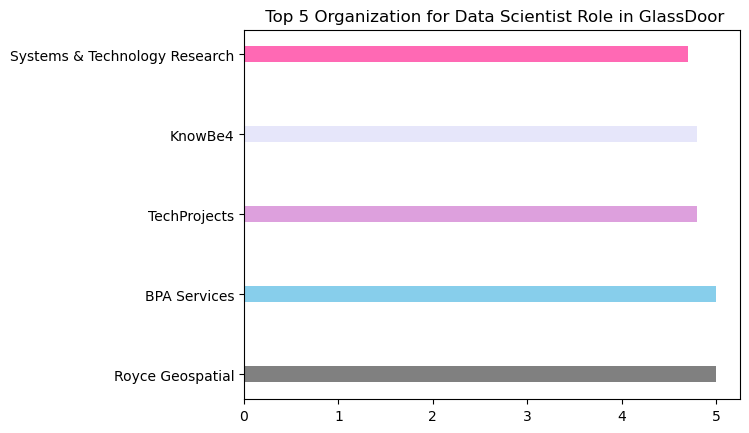

In [25]:
Data=df.groupby(["Job Title"]).get_group("Data Scientist").sort_values(by='Rating',ascending=False).head(5)
DataScience=Data[['Rating','CompanyName']]
#print (DataScience)
Rating=DataScience['Rating'].to_list()
#print (Rating)
Company=DataScience['CompanyName'].to_list()



colors=['gray','skyblue','plum','lavender','hotpink']
plt.barh(Company,Rating,height=0.2,color=colors)
plt.title(" Top 5 Organization for Data Scientist Role in GlassDoor")
plt.show()

#### Insight :- Royce Geospatial , BPA Services is the top rated organization for data scientiest job role

# 3.Ratings

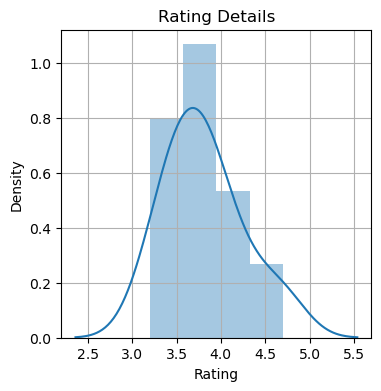

In [26]:
RatingDetails=df['Rating'].value_counts().head(10)
#print (RatingDetails)
Rating=RatingDetails.index.to_list()
#print (Rating)
Count=RatingDetails.to_list()
#print (Count)

#Using Seaborn Module (Seaborne is matplotlib underneath)
import seaborn as sns
plt.figure(figsize=(4,4))
sns.distplot(Rating)
plt.title("Rating Details")
plt.xlabel("Rating")
plt.grid()
plt.show()

#### Insight:- The Average Rating in Glassdoor is 3.8/3.9

# 4.Job Seniority

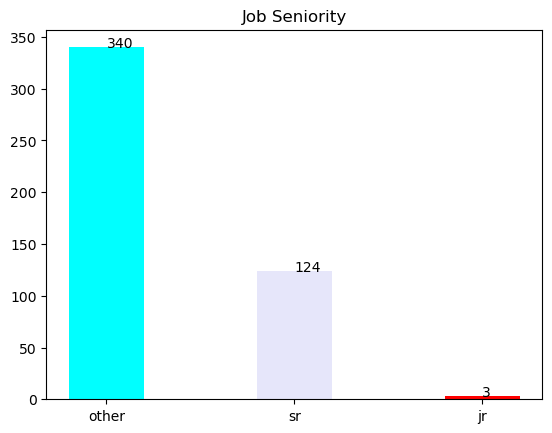

In [27]:
JobSeniority=df['seniority_by_title'].replace("na","other",inplace=True)
#print (JobSeniority)
JobSeniority=df['seniority_by_title'].value_counts()
#print (JobSeniority)
Seniority=JobSeniority.index.to_list()
#print (Seniority)
Count=JobSeniority.to_list()
#print (Count)
colors=['cyan','lavender','red']
plt.bar(Seniority,Count,width=0.4,color=colors)
for i, v in enumerate(Count):
    plt.text(i,v,str(v))

plt.title("Job Seniority")
plt.show()

#### Insight:- 340 people have different type of designation, 124 people are senior & rest are junior

# 5.Top 15 Companies

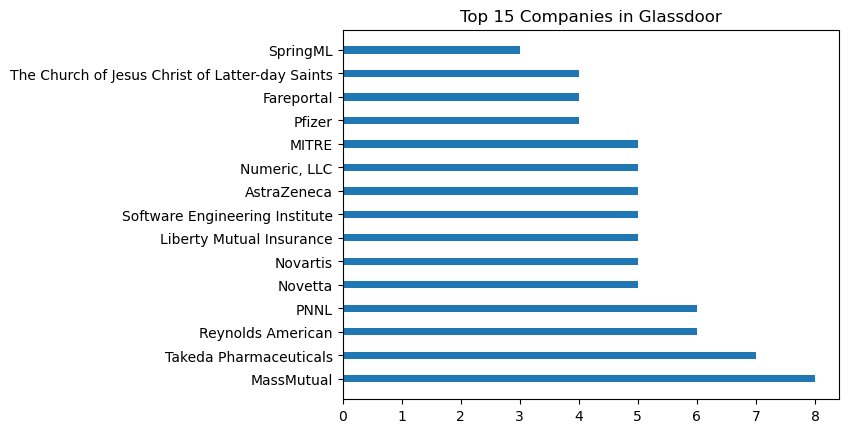

In [28]:
CompanyDetails=df['CompanyName'].value_counts().nlargest(15)
Company=CompanyDetails.index.to_list()
#print (Company)
Count=CompanyDetails.to_list()
#print (Count)

    
plt.barh(Company,Count,height=0.3)
plt.title ("Top 15 Companies in Glassdoor")
plt.show()  

#### Insight:- MassMutual, Take Pharmaceuticals followed by Reynolds American are the top Companies in Glassdoor

# 6.Salary 

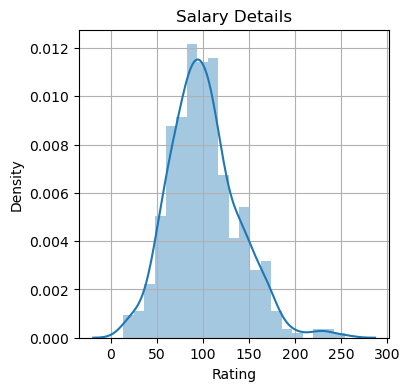

In [29]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.distplot(a=df['Salary'])
plt.title("Salary Details")
plt.xlabel("Rating")
plt.grid()
plt.show()

#### Insight:-Average Salary ranges between 95 to 100.

# 7.Top 5 Sector

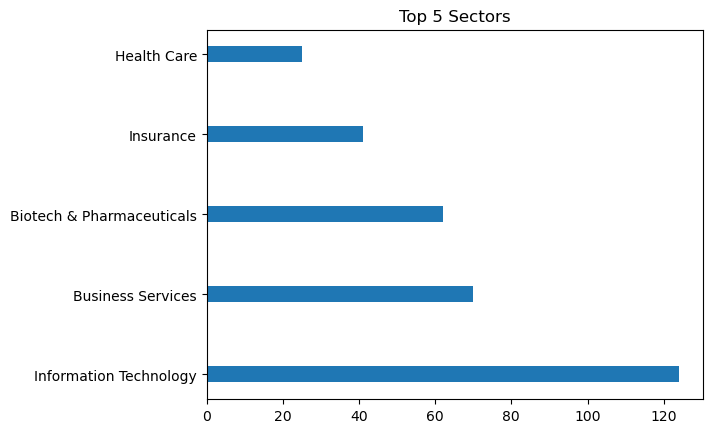

In [30]:
SectorName=df['Sector'].value_counts().nlargest(5)
Name=SectorName.index.to_list()
#print (Name)
Count=SectorName.to_list()
#print (Count)

plt.barh(Name,Count,height=0.2)
plt.title("Top 5 Sectors")
plt.show()

#### Insight:-Information Technology, Biotech & Pharmaceuticals , Business Services Top the list of the most popular jobs by sector.Having experience in any of the field may help to get an job oppurtunity.

# 8. Top 15 Ownership

In [31]:
print (df['Type of ownership'])

0       Company - Private
1      Other Organization
2       Company - Private
3              Government
4       Company - Private
              ...        
695      Company - Public
700     Company - Private
716     Company - Private
732     Company - Private
735     Company - Private
Name: Type of ownership, Length: 467, dtype: object


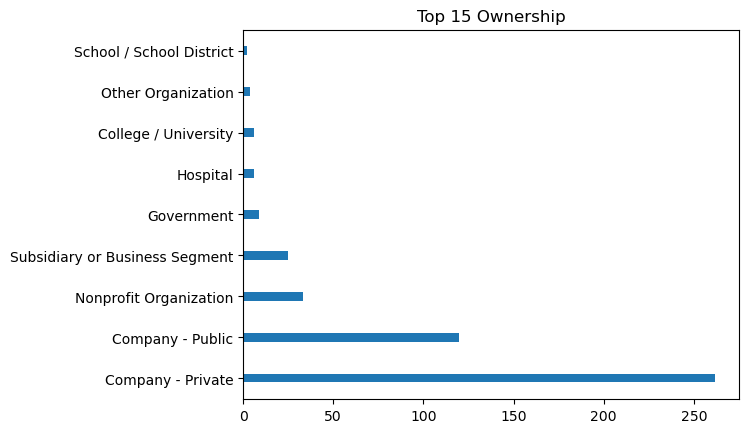

In [32]:
OwnershipDetails=df['Type of ownership'].value_counts().nlargest(15)
Name=OwnershipDetails.index.to_list()
#print (Name)
Count=OwnershipDetails.to_list()
#print (Count)

plt.barh(Name,Count,height=0.2)
plt.title ("Top 15 Ownership")
plt.show()

#### Insight:Majority of the Ownnership is either Private or Public followed by Nonprofit Organiation and others

# 9. Revenue

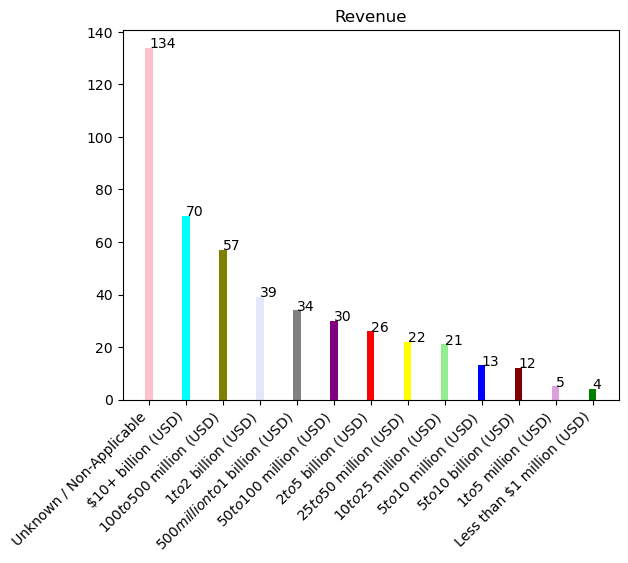

In [33]:
RevenueDetails=df['Revenue'].value_counts()
Name=RevenueDetails.index.to_list()
Count=RevenueDetails.to_list()

colors=['pink','cyan','olive','lavender','gray','purple','red','yellow','lightgreen','blue','maroon','plum','green']
plt.bar(Name,Count,width=0.2,color=colors)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title ("Revenue")
for i,v in enumerate(Count):
    plt.text(i,v,str(v))
plt.show()

#### Insight:-

# 10. Find out the salary of those Organization for Data Sience Job Role who knows Python,SQL,EXCEL,POWER BI 

[114.0, 100.5, 97.5, 95.0, 85.0, 72.5]
['TRANZACT', 'Quick Base', 'MITRE', 'CyrusOne', 'First Command Financial Services, Inc.', 'Credera']


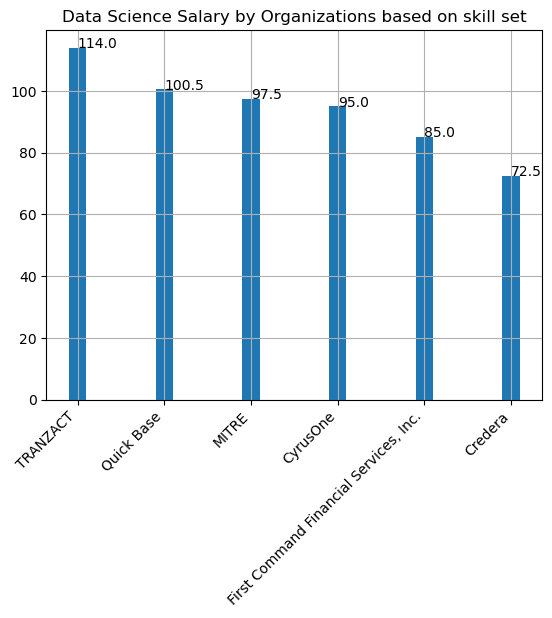

In [34]:
data=df.groupby("Job Title").get_group("Data Scientist")
#print (data)
DS=data[(data['Python']==1) & (data['excel']==1) & (data['sql']==1) & (data['bi']==1)].sort_values(by='SalarySlab', ascending=False)
#print (DS)
#print (type(DS))
Salary=DS['Salary'].to_list()
print (Salary)
Company=DS['CompanyName'].to_list()
print (Company)

plt.bar(Company,Salary,width=0.2)
plt.xticks(rotation=45,horizontalalignment='right')
plt.title('Data Science Salary by Organizations based on skill set')
for i,v in enumerate(Salary):
    plt.text(i,v,str(v))
plt.grid()
plt.show()

#### Insight:-TRANZACT,Quick Base are the top organizations which pays the highest to Data Science Job Role who possess the certain skill set.

[69.0, 65.5]
['TrueAccord', 'Yesler']


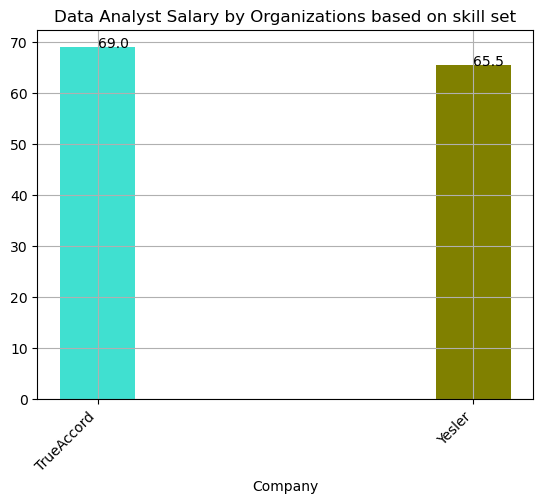

In [35]:
data=df.groupby("Job Title").get_group("Data Analyst")
#print (data)
DA=data[(data['Python']==1) & (data['excel']==1) & (data['sql']==1) & (data['bi']==1)].sort_values(by='SalarySlab', ascending=False)
#print (DS)
#print (type(DS))
Salary=DA['Salary'].to_list()
print (Salary)
Company=DA['CompanyName'].to_list()
print (Company)

plt.bar(Company,Salary,width=0.2, color=['turquoise','olive'])
plt.xlabel("Company")
plt.xticks(rotation=45,horizontalalignment='right')
plt.title('Data Analyst Salary by Organizations based on skill set')
for i,v in enumerate(Salary):
    plt.text (i,v,str(v))
plt.grid()
plt.show()

#### Insight TrueAccord,Yesler are the top two organization which pays the highest to Data Analyst Job Role who possess the certain skills

# 12.Posting by Company Size

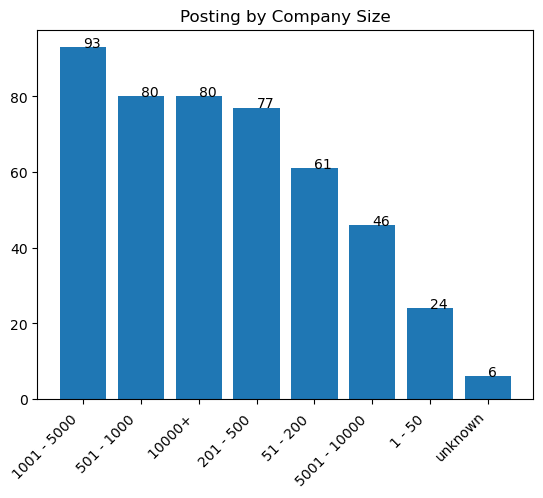

In [36]:
CompanySize=df['Size'].value_counts()
Size=CompanySize.index.to_list()
Count=CompanySize.to_list()

plt.bar(Size,Count)
plt.title("Posting by Company Size")
plt.xticks(rotation=45,horizontalalignment='right')
for i, v in enumerate(Count):
    plt.text(i,v,str(v))
plt.show()

#### Insight:-From the graph it is evident that medium size organization are having the most Data Science oppurtunities.

## Conclusion :-
#### MassMutual, Takeda Pharmaceuticals, Reynolds American are the top organizations offering different types of Job Roles in Glassdoor.
#### Data Scientist, Data Engineer, Senior Data Scientist are the Top Job Roles.
#### The majority rating are of 3.8 or 3.9 & the Average Salary ranges between 95 to 100.
#### Information Technology, Biotech & Pharmaceuticals , Business Services Top the list of the most popular jobs by sector.Having experience in any of the field may help to get an job oppurtunity.
#### Majority of these sectors comes under Private and Public ownership and  medium size organization are having the most Data Science oppurtunities.
#### TRANZACT,Quick Base are the top organizations which pays the highest to Data Science Job Role who possess the certain skill set.
#### TrueAccord,Yesler are the top two organization which pays the highest to Data Analyst Job Role who possess the certain skills